In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base =automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

conn = engine.connect()

In [51]:
# Create a database session object
# Query All Records in the the Database
Measurement_data = pd.read_sql("SELECT * FROM Measurement", conn)
Station_data = pd.read_sql("SELECT * FROM Station", conn)

# Exploratory Precipitation Analysis

In [52]:
# Find the most recent date in the data set.
latest_date = Measurement_data.date.max()
latest_date

'2017-08-23'

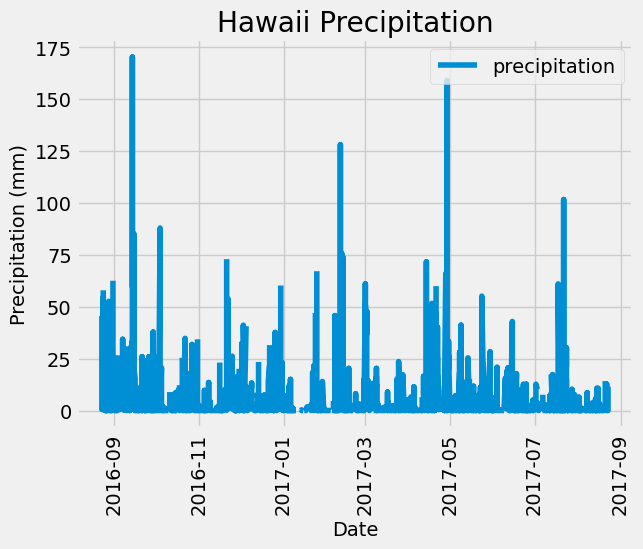

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = (dt.date(2017,8,23))-(dt.timedelta(days=365))

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results)
#df = pd.DataFrame(results, columns = ['date', 'precipitation'])

# Sort the dataframe by date
df['date'] = pd.to_datetime(df['date'])
sorted_df = df.sort_values(by=['date'])

sorted_df=sorted_df.set_index(sorted_df['date'])
sorted_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(sorted_df.prcp)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Precipitation (mm)")
plt.title("Hawaii Precipitation")
plt.legend(["precipitation"],loc='upper right')


plt.savefig("./precipitation_by_dates.png")
plt.show()

In [69]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [70]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.name)).all()

[(9,)]

In [71]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [72]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(11.7, 30.6, 22.8321176470585)]

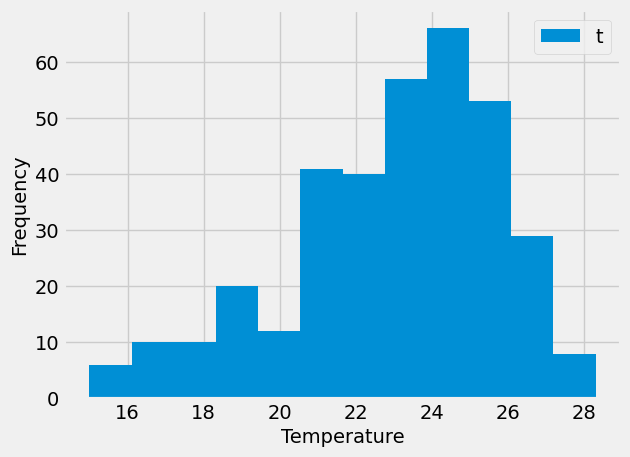

In [87]:
# Using the most active station id
last_12_months_temp = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >= previous_year).filter(Measurement.station == 'USC00519281')

#Check query 
last_12_months_temp.first()
# Query the last 12 months of temperature observation data for this station 

last_12_months_temp_pd = pd.DataFrame(last_12_months_temp)

last_12_months_temp_pd['date'] = pd.to_datetime(last_12_months_temp_pd['date'])
last_12_months_temp_pd = last_12_months_temp_pd.sort_values(by=['date'])
last_12_months_temp_pd = last_12_months_temp_pd.set_index(last_12_months_temp_pd['date'])

#plot the results as a histogram
hist_data = last_12_months_temp_pd['tobs']
hist_data.hist(bins = 12)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs',loc = 'best')
plt.savefig("./Temperature.png")
plt.show()

# Close Session

In [83]:
# Close Session
session.close()